In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Ecommerce Customers to Ecommerce Customers


In [4]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# **$Linear Regression$ From Scratch**

---


# Task
Prepare a continuous target variable for linear regression by selecting the $Yearly Amount Spent$ column. Then, make predictions on the test set, and evaluate its performance using $Mean Squared Error$ ($MSE$) and $R-squared (R2)$ metrics.

## Prepare Features $X$ and Target Variable $y$ for Linear Regression


We will select the $Yearly Amount Spent$ column as the target for the linear regression model.


In [5]:
X = df[["Avg. Session Length",
        "Time on App",
        "Time on Website",
        "Length of Membership"
        ]].values

y = df["Yearly Amount Spent"].values

## Train-Test Split



In [6]:
np.random.seed(42)

indices = np.random.permutation(len(X))
split = int(0.8 * len(X))

train_idx = indices[:split]
test_idx = indices[split:]

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

**Normalize Features**

In [7]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### Initialize $Weights$,$Bias$,$Learning$ $Rate$ and $Epochs$

In [8]:
w = np.zeros(X_train.shape[1])
b = 0
lr = 0.01
epochs = 1000

**Use $Cost Function$ $(MSE)$**

In [9]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

**Train Linear Regression use $(Gradient Descent)$**

In [10]:
for epoch in range(epochs):
    y_pred = np.dot(X_train, w) + b   # Prediction
    # Gradients
    dw = (2 / len(y_train)) * np.dot(X_train.T, (y_pred - y_train))
    db = (2 / len(y_train)) * np.sum(y_pred - y_train)

    w -= lr * dw
    b -= lr * db

    if epoch % 100 == 0:
        y_pred_train = np.dot(X_train, w) + b
        mse_train = mse(y_train, y_pred_train)

**Predict on Test Data**

In [11]:
y_pred_test = np.dot(X_test, w) + b

**Evaluate Model Performance through $MSE$, $R2$**

In [12]:
def r2_score(y_true, y_pred):
    ss_residual = np.sum((y_true - y_pred) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1-(ss_residual/ss_total)

print("Test MSE:" , mse(y_test, y_pred_test))
print("R2 Score:", r2_score(y_test, y_pred_test))

Test MSE: 96.14576106309245
R2 Score: 0.9857410157730689


## Explanation

> After feature normalization, the model achieved a test MSE of approximately 96 (low error) and R2 score of 0.986, indicating excellent predictive performance.



## Final Interpretation

> this tells How much each feature impacts spending



In [13]:
for i, feature in enumerate([
    "Avg. Session Length",
    "Time on App",
    "Time on Website",
    "Length of Membership"
]):
    print(f"{feature}: {w[i]:.2f}")
print(f"Intercept: {b}")

Avg. Session Length: 25.46
Time on App: 38.87
Time on Website: 0.37
Length of Membership: 61.66
Intercept: 498.8058295779472


## Explanation

---
**$$Avg. Session Length$$**
* If the average session length increses by 1 unit, the yearly spending increases by ~ 25.46 units, keeoing all other features constant.

* Moderate positive impact

**$$Time On App$$**

*   If time spend on the mobile app increases by 1 unit, yearly spending increases by ~ 38.87 units.
*   Strong positive impact

**$$Time On Website$$**

*   increasing time on the website by 1 unit, increases spending by only ~ 0.37 units.
*   Almost no impact
*   Website engagement is much less influential than app usage

**$$Length Of Membership$$**

*   If membership length increases by 1 unit, yearly spending increases by ~ 61.66 units.
*   Strongest influence on yearly customers spending
*   Long-term customers spend much more

**$$Intercept(Bias)$$**

*   This is the baseline spending

## These results suggest that long-term engagement and mobile app usage are $key$ $drivers$ of revenue












# Next

---



**Check how much $Predicted$
value close from $Actual$ value**

In [21]:
for i in range(5):
  print(f"Actual: {y_test[i]}, Predicted: {y_pred_test[i]}")

Actual: 536.1308968550214, Predicted: 537.89891059604
Actual: 432.7207178399336, Predicted: 429.5784717048515
Actual: 534.7714849461672, Predicted: 531.9486490542789
Actual: 393.8573709860865, Predicted: 399.83877271367567
Actual: 597.7398788791847, Predicted: 598.2873316686196


# **$Actual$ vs $Predicted$ plot**

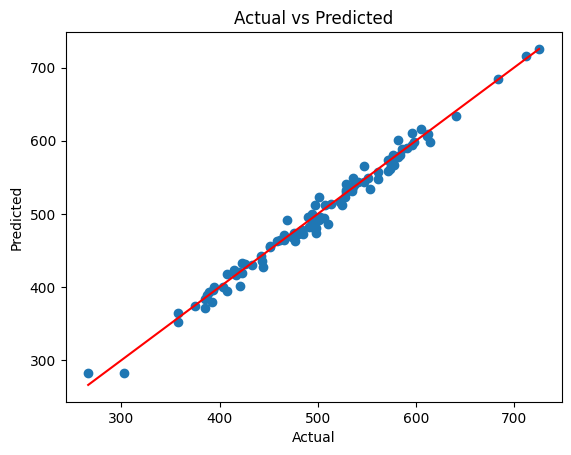

In [22]:
plt.figure()
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

## Explanation

---

> Points close to diagonal (Excellent Model)




